## Caso CONTIGO

### Case description

#### Part 1: Analysis of the state of the business.

You are a business analyst working for a startup that has one credit product called Contigo. Depending on their risk level, the customer will receive:

1. Contigo A, a $1000 MXN loan to be paid in full after one month with 15% interest. This product is
given to higher risk customers (less likely to pay back).
2. Contigo B, a $2000 MXN peso loan to be paid in full after one month with 10% interest. This
product is given to lower risk customers (more likely to pay back).

The team has set the interest rates for the Contigo product from past debt delinquency (DQ) rates, meaning these are the interest rates that maximize total profits – the # of accounts times the per-account net income. **Note that higher interest rates drive higher average per-unit net income, but attract fewer
customers to open accounts.**

However, Contigo’s delinquency rates have been rising. It is estimated that the monthly DQ rate for Contigo A will be 13.5% and 6% for Contigo B through the end of this year. For the purposes of this case, we’re defining

- DQ rate: #accounts_that_did_not_pay_back / #total_originated_accounts. 

The payback outcome in the numerator is binary (0/1) – either someone paid back their total debt or they did not pay at all.Contigo does not allow partial debt repayments.

- 0 --> paid back
- 1 --> Not paid back at all

Ignoring the worsening of DQ rates, your startup has an ambitious growth plan for the year. At month 1, the company had a total of 5,000 Contigo A customers, expected to grow at a rate of 25% month-overmonth. Contigo B has a larger share of customers, 10,000 in total. But with a very competitive market for premium loans, Contigo B is expected to grow at a 10% month over month rate throughout the year.

The operational cost of this startup scales proportionately to its customer base, with negligible fixed expenses. __The current monthly operating cost per account sits at $30 MXN.__ 

Leadership is concerned that the change in DQ rates and the aggressive expansion may reduce profitability in the following months, so they asked you to make a forecast on the net income of its operation (ignoring taxes) in the next 12 months.

### Questions:

- 1. What factors may be against the profitability of the startup? What should we look at in an analysis of the net income for the following months?

R= So, as I look into our startup's Net income that affects directly our profitability for the next months based in the information that was provided in the case.

**Net Income** = Revenue−Expenses−Losses

Firstly, the escalating delinquency rates for both Contigo A and B are a cause for concern. The increase in defaults poses a direct threat to our revenue stream, potentially necessitating additional expenditure on collections.

Then there's customer acquisition costs. If those shoot up because of competition or changes in marketing, it's eating into our profits. We've also to keep operations tight. So, streamlining processes is a priority. Economic shifts matter too. If things take a downturn, we could see more people defaulting. 

In conclusion, the main factors that we should have into consideration are:
- Rising delinquency rates
- The customer acquisition costs.

These factors directly influence our Net income, making them critical focal points for strategic management.


- 2. Is this startup going to be profitable during the next 12 months? What are the major trends driving changes in net income? Suggestion: Build a model for net income and forecast it for the next 12 months. Hint: losses come from the total debt not being repaid, and revenue comes from collected interest. We will only consider operation costs as expenses.

#### Forecast model

As it was suggested, we´ll build firt our forecast model before we answer the question

In [1]:
# Define initial variables and parameters
CA_init = 5000
CB_init = 10000
growth_rate_CA = 0.25
growth_rate_CB = 0.10
DQ_rate_CA = 0.135
DQ_rate_CB = 0.06
loan_amount_CA = 1000
loan_amount_CB = 2000
interest_rate_CA = 0.15
interest_rate_CB = 0.10
operating_cost_per_account = 30
months = 12

# Initialize lists to store results
revenue_CA = []
revenue_CB = []
losses_CA = []
losses_CB = []
operating_cost = []
net_income = []

# Calculate and forecast
CA_current = CA_init
CB_current = CB_init
for month in range(months):
    # Calculate revenue
    revenue_CA_month = CA_current * loan_amount_CA * interest_rate_CA
    revenue_CB_month = CB_current * loan_amount_CB * interest_rate_CB
    revenue_CA.append(revenue_CA_month)
    revenue_CB.append(revenue_CB_month)
    
    # Calculate losses
    losses_CA_month = CA_current * DQ_rate_CA * loan_amount_CA
    losses_CB_month = CB_current * DQ_rate_CB * loan_amount_CB
    losses_CA.append(losses_CA_month)
    losses_CB.append(losses_CB_month)
    
    # Calculate operating cost
    operating_cost_month = (CA_current + CB_current) * operating_cost_per_account
    operating_cost.append(operating_cost_month)
    
    # Calculate net income
    # Here we´ll be able to answer the question --> What are the major trends driving changes in net income? 
    net_income_month = (revenue_CA_month + revenue_CB_month) - (losses_CA_month + losses_CB_month) - operating_cost_month
    net_income.append(net_income_month)
    
    # Project the number of customers for next month
    CA_current *= (1 + growth_rate_CA)
    CB_current *= (1 + growth_rate_CB)

# Check profitability
profitable = all(net_income[i] >= 0 for i in range(months))

# Print forecasted net income for the next 12 months
for month in range(months):
    print(f"Month {month+1}: Net Income = ${net_income[month]:.2f} MXN")

# Output whether the startup will be profitable
if profitable:
    print("The startup is projected to be profitable over the next 12 months.")
else:
    print("The startup is projected to be unprofitable over the next 12 months.")


Month 1: Net Income = $425000.00 MXN
Month 2: Net Income = $456250.00 MXN
Month 3: Net Income = $487812.50 MXN
Month 4: Net Income = $519015.63 MXN
Month 5: Net Income = $548944.53 MXN
Month 6: Net Income = $576373.16 MXN
Month 7: Net Income = $599678.21 MXN
Month 8: Net Income = $616730.68 MXN
Month 9: Net Income = $624759.57 MXN
Month 10: Net Income = $620180.30 MXN
Month 11: Net Income = $598379.30 MXN
Month 12: Net Income = $553443.44 MXN
The startup is projected to be profitable over the next 12 months.


Now let's look at our forecast in a more graphic way to understand the trend

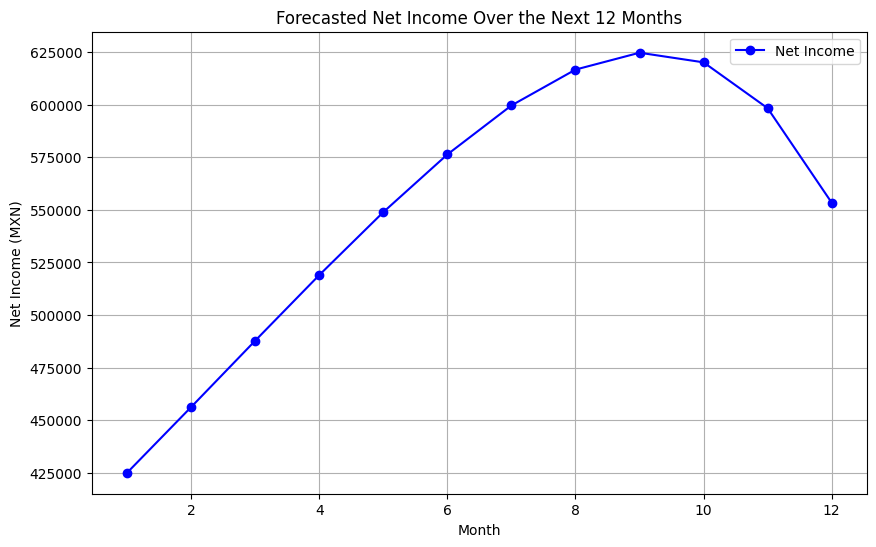

In [2]:
import matplotlib.pyplot as plt

# Define the months for the x-axis
months_range = range(1, months + 1)

# Plot the net income over the next 12 months
plt.figure(figsize=(10, 6))
plt.plot(months_range, net_income, marker='o', color='b', label='Net Income')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Net Income (MXN)')
plt.title('Forecasted Net Income Over the Next 12 Months')
plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()


### Conclusion
As we can see in the previous graph, our forecast is positive until month 9. From then on we will have to adjust our parameters so that the profit does not decrease.

- 3. What changes are required to sustain the business not only throughout the year but in the long run? Build a proposal of changes to main startup KPIs to achieve this goal. Discuss what difficulties the startup may find in applying your recommendation.

R= Based on the forecast model created previously, the recommendation is to focus mainly on these three indicators:

#### KPI´s
##### Customer Acquisition Cost (CAC):
- Proposal: Reduce customer acquisition costs through more efficient marketing strategies, such as optimizing digital channels and implementing customer referral programs. The difficulty we would encounter is that our marketing strategies are not effective. However, at a financial level it is a key point since it is a single variable that affects our profitability. 
##### Customer Retention Rate:
- Proposal: Improve customer retention through personalized services, effective communication, and loyalty programs. Implement feedback systems to understand and address customer needs. This strategy goes hand in hand with the CAC, the difficulty lies in the fact that the process of acquiring new clients is not well structured so that our service is impeccable.
##### Credit Risk Management:
- Proposal: Strengthen credit risk management by using advanced data analytics and machine learning algorithms to enhance accuracy in identifying high-risk customers. The main difficulty could be that this model that would be worked on was not in line with the ambitious growth that you propose. However, we could make a cost-benefit matrix to see which of the two options is more profitable for the business? Have more clients who may not pay or less than if they pay their loans.

#### Part 2: Analysis of a collection strategy.

The Credit department has decided to prioritize collections on Contigo A customers, since they have a higher DQ rate. A collections analyst has determined that a DQ rate of 10% will be enough to render this customer segment profitable. The team has decided to apply immediate action from month 1 and is looking for a collection strategy to recover (at least!) 175 of the 675 accounts that went delinquent, out of
the starting 5,000 Contigo A accounts.

One idea is to collect by calling the customer. Using the previous collection results, the data science team has created a model to estimate contactability (i.e. the probability of reaching the customer successfully by calling)  and has delivered their calculations to you (please, consult the spreadsheet called
contactabilty_scores). The collections team estimates that the customer will pay around three quarters of the time after being contacted, and it has no chance to pay if they never connect the call. Calling the customer is quite expensive! Operations has determined that a phone call campaign costs around 30 pesos per DQ customer, regardless of the contact result.

**For this second part I will follow the following steps to resolve the case**

#### 1. Downloading csv file

The file was downloaded and placed in the "data" folder.

#### 2. Upload it to our PostgreSQL database manager.

2.1. BD and Table creation

- Table Creation command:

In [1]:
"""Create table Contigo (
	customer_id varchar(80),
	contactability_score numeric,
	total_debt numeric,
	interest numeric	
)
"""

'Create table Contigo (\n\tcustomer_id varchar(80),\n\tcontactability_score numeric,\n\ttotal_debt numeric,\n\tinterest numeric\t\n)\n'

- Import data command:

In [ ]:
"""copy public.contigo (customer_id, contactability_score, 
                        total_debt, interest) 
FROM 'C:/Users/calde/OneDrive/ESCRIT~1/STORIB~1/Data/CONTAC~1.CSV' 
DELIMITER ',' 
CSV HEADER 
ENCODING 'UTF8' QUOTE '\"' ESCAPE '''';
"""""

#### 3. Establishing a database connection with Python

This step is primarily done in order to conduct an EDA (Exploratory Data Analysis).

In [2]:
# Import libraries
import psycopg2
import psycopg2.extras
import pandas as pd
import os 
from pathlib import Path 
from psycopg2 import sql

In [25]:
#Establish connection
connection = psycopg2.connect(
        host= 'localhost',
        dbname = "Stori_Contigo_Challenge",
        user= "postgres" ,
        password = 'Lmop-1549f',
        port = 5432)

#### 4. I begin querying my table to conduct my EDA.

In [27]:
#Query Statement
Statement1 = """
SELECT customer_id,
contactability_score,
total_debt,
interest 
FROM Contigo
"""

In [28]:
# Use the cursor to aim the data
cursor = connection.cursor(cursor_factory=psycopg2.extras.DictCursor)
cursor.execute(Statement1)
df = cursor.fetchall()
print(type(df))

<class 'list'>


In [29]:
import pandas as pd
df = pd.DataFrame(df)
df.columns =["customer_id","contactability_score","total_debt","interest"]
df.head(5)

,customer_id,contactability_score,total_debt,interest
0,1,0.293,1000,150
1,2,0.25,1000,150
2,3,0.033,1000,150
3,4,0.239,1000,150
4,5,0.681,1000,150


In [7]:
#Dataframe Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           675 non-null    object
 1   contactability_score  675 non-null    object
 2   total_debt            675 non-null    object
 3   interest              675 non-null    object
dtypes: object(4)
memory usage: 21.2+ KB


In [8]:
# Converting Python DataFrame data types
df['contactability_score'] = df['contactability_score'].astype('float') 
df['total_debt'] = df['total_debt'] .astype('float') 
df['interest'] = df['interest'].astype('float') 

In [11]:
#Count by variable type
df.dtypes.value_counts()

float64    3
object     1
dtype: int64

In [12]:
# Dataframe size
df.shape

(675, 4)

#### Are there explicit null values in the dataset?

In [13]:
df.isnull().any()

customer_id             False
contactability_score    False
total_debt              False
interest                False
dtype: bool

#### Let's explore our outlier values.

In [15]:
# Get columns with object data types (categorical)
categoricas = df.select_dtypes(include=['object'])

# Get columns with numeric data types
numericas = df.select_dtypes(exclude=['object'])

# Show the column names in each group
print("Categorical variables:")
print(categoricas.columns)

print("\nNumerical variables:")
print(numericas.columns)

Variables categóricas:
Index(['customer_id'], dtype='object')

Variables numéricas:
Index(['contactability_score', 'total_debt', 'interest'], dtype='object')


In [14]:
#I define my function to avoid repeating code
def calcular_quartiles(columna):
    promedio = columna.mean()
    median = columna.median()
    Q1 = columna.quantile(q=0.25)
    Q3 = columna.quantile(q=0.75)
    min_val = columna.quantile(q=0)
    max_val = columna.quantile(q=1.0)
    return min_val, Q1, promedio,  median, Q3, max_val

In [18]:
# Execute the calculate_quartiles function for a specific column.
min_val, Q1, promedio,  median, Q3, max_val = calcular_quartiles(numericas["contactability_score"])

# Create a DataFrame with the results
balance_results = pd.DataFrame({
    'Statistics': ['Min', 'Q1', 'Mean','Median', 'Q3', 'Max'],
    'Value': [min_val, Q1, promedio, median, Q3, max_val]
})

# Display the DataFrame with the results
print(balance_results)

  Estadística     Valor
0      Mínimo  0.001000
1          Q1  0.166500
2    promedio  0.418813
3     Mediana  0.378000
4          Q3  0.651000
5      Máximo  0.999000


#### Thresholds for outlier detection (symmetrically distributed data).

In [19]:
# Find my IQR (Interquartile Range).
iqr = Q3 - Q1
## Range
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print('range for outlier detection: {}, {}'.format(minlimit, maxlimit))

rango para detección de outliers: -0.56025, 1.37775


In [20]:
print(iqr,"   ",Q1,"   ",Q3, "   ", promedio )

0.48450000000000004     0.1665     0.651     0.41881333333333326


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 0, '')]

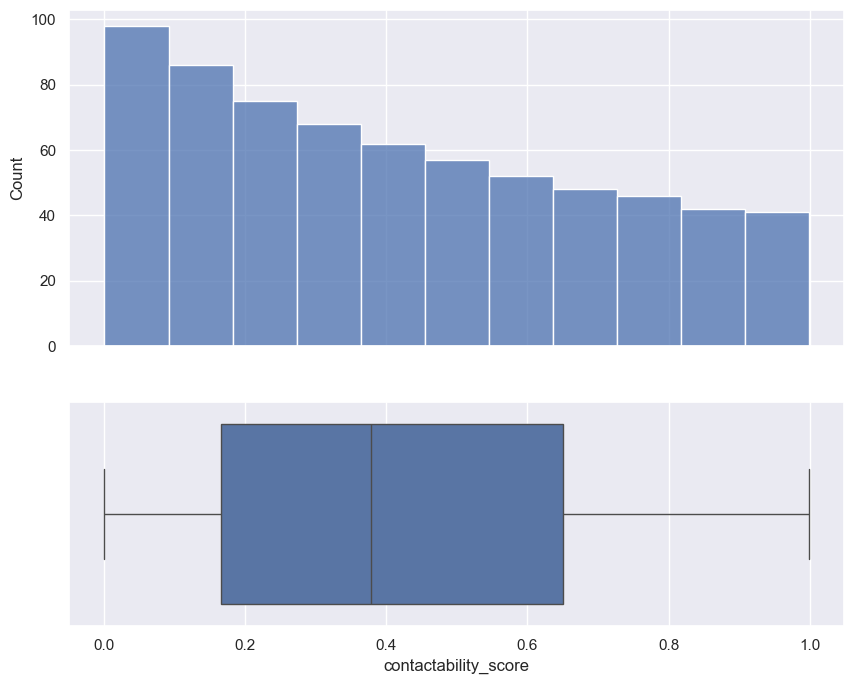

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(numericas["contactability_score"], ax=ax_hist)
sns.boxplot(data=numericas, x="contactability_score", ax=ax_box)
ax_hist.set(xlabel='')

### Conclusion EDA

Data is very clean

### Questions:

- Assuming that we launch this campaign to all of the 675 DQ customers, a manager asks you to compute the probable result of this campaign, asking you to deliver estimates on the following KPIs:

a. Recovered accounts.

R= To achieve this I will multiply the contactability_score by each customer and use the following logic:

If I have 23% chance that I contact a customer, I don't have a lead but a 0.23 lead. Then I will add up all these leads to have according to the contactability_score given the number of recovered accounts.

In [30]:
# List of contactability_scores for each client
contactability_scores = df["contactability_score"]

# Total number of DQ customers
total_clientes_DQ = 675

# Multiplying each contactability_score by 1 (does not change the value)
valores_recuperados = [score * 1 for score in contactability_scores]

# Sum the values of each row to obtain an estimate of the number of accounts recovered.
cuentas_recuperadas = round(sum(valores_recuperados))

print("Approximate number of accounts recovered:", cuentas_recuperadas)

Approximate number of accounts recovered: 283


b. Recovered total debt.

R= To obtain this indicator my procedure will be:

- Establish the total amount of outstanding debt for each DQ account.
- Calculate the total amount of outstanding debt for all DQ accounts.
- Multiply the average total amount of outstanding debt recovered by the estimated number of accounts recovered.

In [31]:
# It is a constant for all the contigo b customer
total_debt_pending = 1000

# Calculating the total amount of debt recovered (assuming that all outstanding debt per customer is recovered)
total_debt_recovered = cuentas_recuperadas * total_debt_pending

print("Total debt recovered:", total_debt_recovered)


Total debt recovered: 283000


c. Revenue coming from collected interest. (Note that the total debt collected is not included in revenue, why?).

R= To solve this point I will first convert the interest since I have values like 150 instead of 15% in my interest column (in case it is needed in an operation). Then to answer the question why the total debt collected is not included in revenue? This is because interest represents the additional profit earned by the lender on the principal amount borrowed.

To calculate the "Revenue coming from collected interest", I will multiply the total amount of debt recovered by the percentage of interest collected.

In [32]:
# List of interests
intereses = df["interest"]   

# I divide each interest value by 100 to convert it to a percentage.
intereses_convertidos = [interes / 100 for interes in intereses]


In [33]:
from decimal import Decimal

# Percentage of interest collected (in decimal format)
porcentaje_intereses = Decimal('0.15')  # 15%

# Revenue coming from collected interest" is calculated by multiplying the debt recovered by the percentage of interest collected.
revenue_intereses = total_debt_recovered * porcentaje_intereses

print("Revenue coming from collected interest:", revenue_intereses)

Revenue coming from collected interest: 42450.00


d. Total campaign cost.

R= To obtain this indicator I will multiply the cost per customer of the call campaign by the total number of DQ customers. Since the cost per customer of the call campaign is 30 pesos, we can multiply this value by the total number of DQ customers to obtain the total cost of the campaign.

In [34]:
# Cost per customer of call campaign
costo_por_cliente = 30  # in pesos

# The total cost of the calling campaign is calculated.
costo_total_campaña = total_clientes_DQ * costo_por_cliente

print("Total campaign cost:", costo_total_campaña, "pesos")


Total campaign cost: 20250 pesos


f. DQ losses coming from uncollected total debt

R= To find this indicator I am going to take into account two main factors

- The number of DQ accounts that were not recovered.
- The amount of total debt that was not recovered from these accounts.

Since we have already calculated the expected number of recovered accounts (recovered_accounts), we can subtract this value from the total number of DQ customers to get the expected number of accounts that were not recovered. We can then calculate the amount of total debt that was not recovered by multiplying this number by the total amount of outstanding debt (total_debt_pending).

In [35]:
# Calculate the expected number of accounts that were not recovered
cuentas_no_recuperadas = total_clientes_DQ - cuentas_recuperadas

# DQ losses from total uncollected debt are calculated
DQ_losses = cuentas_no_recuperadas * total_debt_pending

print("DQ losses coming from uncollected total debt:", DQ_losses)


DQ losses coming from uncollected total debt: 392000


f. Collections income.

R=  First we need to calculate the net income of the collection campaign. This is calculated by subtracting the Total campaign cost from the Recovered total debt and Revenue coming from collected interest.

In [36]:
# Total income generated by debt recovery
ingreso_total_recuperacion = total_debt_recovered + revenue_intereses

# Net income from the collection campaign
ingreso_neto_cobranza = ingreso_total_recuperacion - costo_total_campaña

print("Collections income:", ingreso_neto_cobranza)

Collections income: 305200.00


Deliver your calculation in a spreadsheet, and attach a SQL code computing these results using the contactability score data provided by the data science team.

In [37]:
# I Created a table called 'indicators' with the specified columns
create_table_query = """
CREATE TABLE indicadores (
    cuentas_recuperadas numeric,
    total_debt_recovered numeric,
    revenue_intereses numeric,
    costo_total_campaña numeric,
    DQ_losses numeric,
    ingreso_neto_cobranza numeric
);
"""

# Then the SQL statement is executed to create the table
with connection.cursor() as cursor:
    cursor.execute(create_table_query)
    connection.commit()


In [38]:
# Now an insert SQL statement is created
insert_query = """
INSERT INTO indicadores (cuentas_recuperadas, total_debt_recovered, revenue_intereses, costo_total_campaña, DQ_losses, ingreso_neto_cobranza)
VALUES (%s, %s, %s, %s, %s, %s);
"""

# and the insertion SQL statement is executed
with connection.cursor() as cursor:
    cursor.execute(insert_query, (cuentas_recuperadas, total_debt_recovered, revenue_intereses, costo_total_campaña, DQ_losses, ingreso_neto_cobranza))
    connection.commit()

# The connection is closed
connection.close()

In [39]:
# Query to be provided to data scientists
Query = """
SELECT * FROM Indicadores
"""

### Question #2

2. What is the impact delivered on overall business performance by this campaign? To answer this question, we provide the results of month 1 without collections in the table below. Using the results from the previous question and the data coming from the table, provide a justification for applying or not this collection strategy.

R= The first thing I am going to do is bring the information provided in the guide (table below) to my notebook to be able to make a comparison between the df_without_collections indicators and the df_collections indicators (with collection) in order to get an answer that argues if we should apply or not this collection strategy.

In [40]:
import pandas as pd

Total_new_accounts= cuentas_recuperadas + 5000

# First I create a dictionary with the values
data = {
    "Variable": ["Accounts", "DQ accounts", "revenue_intereses", "costo_total_campaña", "DQ_losses", "ingreso_neto_cobranza"],
    "Valor": [Total_new_accounts, 675, revenue_intereses, costo_total_campaña, DQ_losses, ingreso_neto_cobranza]
}

# Then I create the DataFrame
df_collections = pd.DataFrame(data)

# I finally see the DataFrame created
print(df_collections)

                Variable      Valor
0               Accounts       5283
1            DQ accounts        675
2      revenue_intereses   42450.00
3    costo_total_campaña      20250
4              DQ_losses     392000
5  ingreso_neto_cobranza  305200.00


In [41]:
# Now I repeat the previous process, but to the df_without_collections
databelow = {
    "Variable": ["Accounts", "DQ accounts", "Interest revenue", "DQ losses", "Operative Cost", "Net income"],
    "Valor": [5000, 675, 648750, 675000, 150000, -176250]
}

# Dataframe creation
df_without_collections  = pd.DataFrame(databelow)

# DataFrame showed
print(df_without_collections)   

           Variable   Valor
0          Accounts    5000
1       DQ accounts     675
2  Interest revenue  648750
3         DQ losses  675000
4    Operative Cost  150000
5        Net income -176250


In [42]:

# differences are calculated in numbers
diferencias_numericas = [df_collections["Valor"][i] - df_without_collections["Valor"][i] for i in range(len(df_without_collections))]

# Calculate the differences in percentage
diferencias_porcentaje = [round((diferencias_numericas[i] / df_without_collections["Valor"][i]) * 100, 2) for i in range(len(df_without_collections))]

# A new DataFrame is created with the differences
df_diferencias = pd.DataFrame({
    "Variable": df_without_collections["Variable"],
    "Valor_without_collections": df_without_collections["Valor"],
    "Valor_with_collections": df_collections["Valor"],
    "Diferencia_numerica": diferencias_numericas,
    "Diferencia_porcentaje": diferencias_porcentaje
})

# I round the values ​​in the DataFrame df_differences to a maximum of 2 decimal places
df_diferencias_rounded = df_diferencias.round({'Valor_without_collections': 2, 
                                                'Valor_with_collections': 2, 
                                                'Diferencia_numerica': 2, 
                                                'Diferencia_porcentaje': 2})

# And finally Print the DataFrame with the differences
df_diferencias

,Variable,Valor_without_collections,Valor_with_collections,Diferencia_numerica,Diferencia_porcentaje
0,Accounts,5000,5283,283,5.66
1,DQ accounts,675,675,0,0.0
2,Interest revenue,648750,42450.00,-606300.00,-93.46
3,DQ losses,675000,20250,-654750,-97.0
4,Operative Cost,150000,392000,242000,161.33
5,Net income,-176250,305200.00,481450.00,-273.16


#### Conclusion

- As we can see in our previous table, the campaign with collection is justified since mainly our net income is much higher than by not doing this collection campaign. Therefore, it is recommended to proceed with the campaign.

### Question #3

Discuss some possible improvements to this campaign.

R= The numbers don't lie, but when it comes to planning logic can be a strong ally, so some strategies that I would propose so that we have greater success in the campaign are the following:

- Customer segmentation: Divide customers into different ones mainly by contactability_score to take into account mainly those whose contactability_score is much higher (Possibly I would do an ABC pareto).
- Predictive analysis: We may use predictive analysis techniques to identify patterns and trends in the historical collection data of such clients (if we have these records). This will allow us to predict which customers are most likely to default on payments in the future and take preventive measures (remove them from the campaign).
- Process automation: Implement automated collection management systems that can send payment reminders, track overdue accounts and assign tasks to collection agents efficiently, in order to reduce our phone call campaign costs.
- Staff training: Before executing this training, it has happened to me before that we can have the perfect plan, but the execution is not aligned so anything we do may not work the way we expect.
- Incentives and recognition: This goes hand in hand with staff training, by implementing a system of incentives and recognition we will motivate collection agents to achieve specific objectives and improve their performance in debt recovery.
- Feedback and analysis of results: Collecting customer comments about their experience with the collection process (well categorized in a database) and using this information to make continuous improvements is essential to increase the effectiveness of future campaigns. Additionally, conduct regular analysis of collection campaign results to identify areas of opportunity and make informed decisions for the future.